In [11]:
import pandas as pd
data = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_clear_newlabel.csv',index_col=0)
data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,total_label
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,4.558868
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,-1.468816
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,-2.524768
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0,0.574245
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,0,-1.157093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,0,-1.373230
356251,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,0,-1.127277
356252,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,0,1,0,0,0,0,0,1,0,2.734850
356253,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0,0,1,0,0,2.899147


# 使用PC_SK_DPDMix_Max為label

In [2]:
# 取出installment想要用的標籤，決定不使用
installment = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_train_test_clear_nomissing.csv',index_col=0)
installment = installment[['NAN']]
installment[installment['NAN']>0].count()

NAN    1215
dtype: int64

In [3]:
# 取出pos_cash想要用的標籤
pos_cash = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_train_test_clear_nomissing.csv',index_col=0)
pos_cash = pos_cash[['PC_SK_DPDMix_Max']]
pos_cash[pos_cash['PC_SK_DPDMix_Max']>0].count()

PC_SK_DPDMix_Max    62984
dtype: int64

In [4]:
# 決定用pos_cash試試看
pos_cash = pd.DataFrame(pos_cash['PC_SK_DPDMix_Max'].apply(lambda x:1 if x>0 else x),columns=['PC_SK_DPDMix_Max'])
# pos_cash.hist()
# pos_cash[pos_cash['PC_SK_DPDMix_Max']>0].count()
pos_cash.rename(columns={"PC_SK_DPDMix_Max":"PC_SK_DPDMix_Max_y"},inplace=True)
pos_cash

,PC_SK_DPDMix_Max_y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
356250,0.0
356251,0.0
356252,0.0
356253,0.0


In [5]:
new_data = pd.concat([data,pos_cash],axis=1)
new_data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,total_label,PC_SK_DPDMix_Max_y
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,1,0,0,0,0,0,1,0,4.558868,0.0
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,1,1,0,0,0,0,0,0,-1.468816,0.0
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,-2.524768,0.0
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0.574245,0.0
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,-1.157093,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,-1.373230,0.0
356251,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,-1.127277,0.0
356252,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,1,0,0,0,0,0,1,0,2.734850,0.0
356253,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,1,0,0,0,0,1,0,0,2.899147,0.0


In [6]:
one = new_data[new_data['PC_SK_DPDMix_Max_y']==1].iloc[:60000,:]
zero = new_data[new_data['PC_SK_DPDMix_Max_y']==0].iloc[:60000,:]
subset = pd.concat([one,zero],axis=0)
subset

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,total_label,PC_SK_DPDMix_Max_y
5,100008,0,99000.000,1,-16941,-1588,-4970.0,-477,1,1,...,0,0,0,0,0,0,0,0,1.626092,1.0
8,100011,0,112500.000,1,-20099,-1224,-7427.0,-3514,0,0,...,0,0,0,0,0,0,0,0,5.175646,1.0
11,100015,0,38419.155,1,-20417,-1224,-5246.0,-2512,0,0,...,0,0,0,0,0,0,0,0,-1.551197,1.0
28,100033,0,270000.000,3,-9994,-1796,-4668.0,-2661,1,0,...,0,0,0,0,0,0,0,0,3.126437,1.0
35,100041,0,112500.000,3,-12158,-1275,-6265.0,-2009,1,1,...,1,0,0,0,0,0,1,0,1.288715,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72983,184624,0,157500.000,3,-10006,-1716,-331.0,-344,1,0,...,0,0,0,0,0,0,0,0,0.529776,0.0
72986,184627,0,315000.000,3,-10826,-1706,-5354.0,-526,1,0,...,1,0,0,0,0,1,0,0,-2.074951,0.0
72988,184629,2,90000.000,1,-11901,-1600,-2726.0,-2729,1,1,...,0,0,0,0,0,0,0,0,-1.266226,0.0
72989,184631,0,67500.000,1,-16132,-1313,-8374.0,-4192,1,0,...,0,0,0,0,0,0,0,0,0.214131,0.0


In [7]:
# Random Forest 的 feature selection
group1_feature = subset[['DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL','DAYS_EMPLOYED','HOUR_APPR_PROCESS_START','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS','FLAG_PHONE']]
group1_feature

,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_ID_PUBLISH,AMT_INCOME_TOTAL,DAYS_EMPLOYED,HOUR_APPR_PROCESS_START,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAM_MEMBERS,FLAG_PHONE
5,-2536.0,-4970.0,-16941,-477,99000.000,-1588,16,0.0,1.0,2.0,1
8,0.0,-7427.0,-20099,-3514,112500.000,-1224,14,1.0,1.0,2.0,0
11,-2396.0,-5246.0,-20417,-2512,38419.155,-1224,7,0.0,2.0,2.0,1
28,-849.0,-4668.0,-9994,-2661,270000.000,-1796,11,0.0,1.0,1.0,0
35,-1285.0,-6265.0,-12158,-2009,112500.000,-1275,19,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
72983,-319.0,-331.0,-10006,-344,157500.000,-1716,18,0.0,4.0,2.0,0
72986,-2.0,-5354.0,-10826,-526,315000.000,-1706,12,0.0,0.0,2.0,1
72988,-1437.0,-2726.0,-11901,-2729,90000.000,-1600,16,0.0,2.0,4.0,1
72989,-1491.0,-8374.0,-16132,-4192,67500.000,-1313,12,0.0,2.0,2.0,0


In [8]:
# ref_feature_selection
group2_feature = subset[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]
group2_feature

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
5,99000.000,-16941,-1588,-4970.0,-477,2.0,16,0.0,-2536.0,1.0
8,112500.000,-20099,-1224,-7427.0,-3514,2.0,14,1.0,0.0,1.0
11,38419.155,-20417,-1224,-5246.0,-2512,2.0,7,0.0,-2396.0,2.0
28,270000.000,-9994,-1796,-4668.0,-2661,1.0,11,0.0,-849.0,1.0
35,112500.000,-12158,-1275,-6265.0,-2009,2.0,19,0.0,-1285.0,0.0
...,...,...,...,...,...,...,...,...,...,...
72983,157500.000,-10006,-1716,-331.0,-344,2.0,18,0.0,-319.0,4.0
72986,315000.000,-10826,-1706,-5354.0,-526,2.0,12,0.0,-2.0,0.0
72988,90000.000,-11901,-1600,-2726.0,-2729,4.0,16,0.0,-1437.0,2.0
72989,67500.000,-16132,-1313,-8374.0,-4192,2.0,12,0.0,-1491.0,2.0


array([[<AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>]], dtype=object)

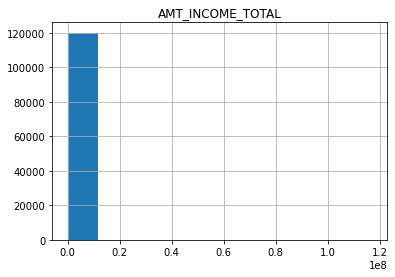

In [9]:
subset[['AMT_INCOME_TOTAL']].hist()

In [85]:
# rfe_feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

X = group2_feature
y = subset[['PC_SK_DPDMix_Max_y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# we can change kernel to rbf, poly, linear
model = SVC(kernel='rbf', C=1.3) # RBF kernel(default)，C為懲罰參數，設越高越不給越界，設越低就可以容忍越界
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('score: {}'.format(score))
print('f1_score: {}'.format(f1_score))
print('con_matrix: {}'.format(con_matrix))

/Users/hazel/opt/anaconda3/envs/crawler/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of correct sample: 14429
accuracy: 0.6012083333333333
score: 0.6012083333333333
f1_score: [0.5870475  0.61443017]
con_matrix: [[6803 5259]
 [4312 7626]]


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

X = group1_feature
y = subset[['PC_SK_DPDMix_Max_y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# we can change kernel to rbf, poly, linear
model = SVC(kernel='rbf', C=1.3) # RBF kernel(default)，C為懲罰參數，設越高越不給越界，設越低就可以容忍越界
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('score: {}'.format(score))
print('f1_score: {}'.format(f1_score))
print('con_matrix: {}'.format(con_matrix))

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of correct sample: 14342
accuracy: 0.5975833333333334
score: 0.5975833333333334
f1_score: [0.58474503 0.6096516 ]
con_matrix: [[6800 5184]
 [4474 7542]]


# 使用late_count_inLoan / Loan_count

In [1]:
import pandas as pd
chao_label = pd.read_csv('/Users/hazel/Documents/credit_project_data/Jen-Chao Huang/main_x_label_0727.csv')
chao_label

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,paper%,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,0,1,...,0,0,0,1,0,0.05,2.0,0.0,38.0,0.0
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,0,1,...,0,0,0,0,0,0.05,6.0,0.0,53.0,0.0
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0.00,2.0,0.0,7.0,0.0
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,0,0,...,0,0,0,0,0,0.05,7.0,0.0,43.0,1.0
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,0,0,...,0,0,0,0,0,0.05,10.0,3.0,132.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0.05,2.0,0.0,7.0,0.0
340361,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,0,0,...,0,0,0,0,0,0.05,8.0,3.0,147.0,10.0
340362,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,0,1,...,0,0,0,1,0,0.05,7.0,0.0,39.0,1.0
340363,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,0,1,0,0,0.05,4.0,1.0,60.0,2.0


In [2]:
chao_label['late_count_inLoan / Loan_count'] = chao_label['late_count_inLoan']/chao_label['Loan_count']
chao_label

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,paper%,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total,late_count_inLoan / Loan_count
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,0,1,...,0,0,1,0,0.05,2.0,0.0,38.0,0.0,0.000
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,0,1,...,0,0,0,0,0.05,6.0,0.0,53.0,0.0,0.000
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0.00,2.0,0.0,7.0,0.0,0.000
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,0,0,...,0,0,0,0,0.05,7.0,0.0,43.0,1.0,0.000
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,0,0,...,0,0,0,0,0.05,10.0,3.0,132.0,19.0,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0.05,2.0,0.0,7.0,0.0,0.000
340361,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,0,0,...,0,0,0,0,0.05,8.0,3.0,147.0,10.0,0.375
340362,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,0,1,...,0,0,1,0,0.05,7.0,0.0,39.0,1.0,0.000
340363,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0.05,4.0,1.0,60.0,2.0,0.250


<AxesSubplot:>

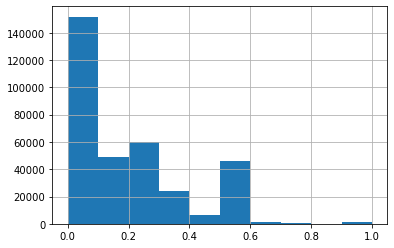

In [3]:
chao_label['late_count_inLoan / Loan_count'].hist()

In [4]:
chao_label['late_count_inLoan / Loan_count'] = pd.DataFrame(chao_label['late_count_inLoan / Loan_count'].apply(lambda x:1 if x>0 else x))
chao_label

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,paper%,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total,late_count_inLoan / Loan_count
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,0,1,...,0,0,1,0,0.05,2.0,0.0,38.0,0.0,0.0
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,0,1,...,0,0,0,0,0.05,6.0,0.0,53.0,0.0,0.0
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0.00,2.0,0.0,7.0,0.0,0.0
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,0,0,...,0,0,0,0,0.05,7.0,0.0,43.0,1.0,0.0
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,0,0,...,0,0,0,0,0.05,10.0,3.0,132.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0.05,2.0,0.0,7.0,0.0,0.0
340361,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,0,0,...,0,0,0,0,0.05,8.0,3.0,147.0,10.0,1.0
340362,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,0,1,...,0,0,1,0,0.05,7.0,0.0,39.0,1.0,0.0
340363,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0.05,4.0,1.0,60.0,2.0,1.0


In [5]:
# rfe_feature_selection_decisiontree
group2_feature = chao_label[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START_x',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]
group2_feature

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,-9461,-637,-3648.0,-2120,1.0,10,2.0,-1134.0,1.0
1,270000.0,-16765,-1188,-1186.0,-291,2.0,11,1.0,-828.0,0.0
2,67500.0,-19046,-225,-4260.0,-2531,1.0,9,0.0,-815.0,0.0
3,135000.0,-19005,-3039,-9833.0,-2437,2.0,17,2.0,-617.0,1.0
4,121500.0,-19932,-3038,-4311.0,-3458,1.0,11,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...
340360,121500.0,-19970,-5169,-9094.0,-3399,1.0,16,1.0,-684.0,1.0
340361,157500.0,-11186,-1149,-3015.0,-3003,4.0,11,2.0,0.0,1.0
340362,202500.0,-15922,-3037,-2681.0,-1504,3.0,12,0.0,-838.0,1.0
340363,225000.0,-13968,-2731,-1461.0,-1364,2.0,10,0.0,-2308.0,2.0


In [6]:
# rfe_feature_selection_random_forest
group3_feature = chao_label[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START_x',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]
group3_feature

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,-9461,-637,-3648.0,-2120,10,2.0,-1134.0,1.0
1,270000.0,-16765,-1188,-1186.0,-291,11,1.0,-828.0,0.0
2,67500.0,-19046,-225,-4260.0,-2531,9,0.0,-815.0,0.0
3,135000.0,-19005,-3039,-9833.0,-2437,17,2.0,-617.0,1.0
4,121500.0,-19932,-3038,-4311.0,-3458,11,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...
340360,121500.0,-19970,-5169,-9094.0,-3399,16,1.0,-684.0,1.0
340361,157500.0,-11186,-1149,-3015.0,-3003,11,2.0,0.0,1.0
340362,202500.0,-15922,-3037,-2681.0,-1504,12,0.0,-838.0,1.0
340363,225000.0,-13968,-2731,-1461.0,-1364,10,0.0,-2308.0,2.0


In [10]:
# rfe_feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

X = group2_feature
y = new_data[['late_count_inLoan / Loan_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# we can change kernel to rbf, poly, linear
model = SVC(kernel='rbf', C=10) # RBF kernel(default)，C為懲罰參數，設越高越不給越界，設越低就可以容忍越界
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('score: {}'.format(score))
print('f1_score: {}'.format(f1_score))
print('con_matrix: {}'.format(con_matrix))

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of correct sample: 42996
accuracy: 0.6316160592305319
score: 0.6316160592305319
f1_score: [0.44719265 0.72376987]
con_matrix: [[10143 18265]
 [ 6812 32853]]


In [7]:
# rfe_feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

X = group3_feature
y = chao_label[['late_count_inLoan / Loan_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# we can change kernel to rbf, poly, linear
model2 = SVC(kernel='rbf', C=6, gamma='auto') # RBF kernel(default)，C為懲罰參數，設越高越不給越界，設越低就可以容忍越界
model2.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)
# cross_val_score = cross_val_score(model2,X,y,cv=3,scoring='accuracy')

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))
# print('cross_val_score: {}',cross_val_score)
# print('cross_val_score_mean: {}',cross_val_score.mean())
print('訓練集：{}'.format(model2.score(X_train, y_train)))
print('測試集：{}'.format(model2.score(X_test,y_test)))

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of correct sample: 43243
accuracy: 0.6352445169156641
con_matrix: [[11282 17337]
 [ 7493 31961]]
f1_score: [0.47609402 0.72023166]
訓練集：0.6386562954475342
測試集：0.6352445169156641


# 使用late_count_total / INSTALMENT_count

In [1]:
import pandas as pd
chao_label = pd.read_csv('/Users/hazel/Documents/credit_project_data/Jen-Chao Huang/processed_allHC_label.csv')
chao_label

,SK_ID_CURR,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total
0,100001,4.0,1.0,16.0,2.0
1,100002,2.0,0.0,38.0,0.0
2,100003,6.0,0.0,53.0,0.0
3,100004,2.0,0.0,7.0,0.0
4,100005,2.0,1.0,20.0,2.0
...,...,...,...,...,...
340360,448526,1.0,0.0,8.0,0.0
340361,449328,1.0,0.0,8.0,0.0
340362,451328,1.0,0.0,12.0,0.0
340363,451362,1.0,0.0,96.0,0.0


In [2]:
chao_label['late_count_total / INSTALMENT_count'] = chao_label['late_count_total']/chao_label['INSTALMENT_count']
chao_label

,SK_ID_CURR,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total,late_count_total / INSTALMENT_count
0,100001,4.0,1.0,16.0,2.0,0.125
1,100002,2.0,0.0,38.0,0.0,0.000
2,100003,6.0,0.0,53.0,0.0,0.000
3,100004,2.0,0.0,7.0,0.0,0.000
4,100005,2.0,1.0,20.0,2.0,0.100
...,...,...,...,...,...,...
340360,448526,1.0,0.0,8.0,0.0,0.000
340361,449328,1.0,0.0,8.0,0.0,0.000
340362,451328,1.0,0.0,12.0,0.0,0.000
340363,451362,1.0,0.0,96.0,0.0,0.000


<AxesSubplot:>

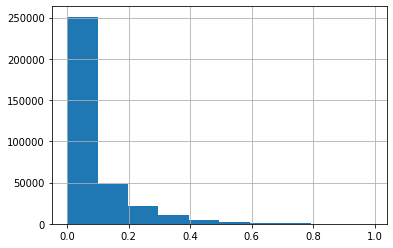

In [3]:
chao_label['late_count_total / INSTALMENT_count'].hist()

,late_count_total / INSTALMENT_count
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
340360,0.0
340361,0.0
340362,0.0
340363,0.0


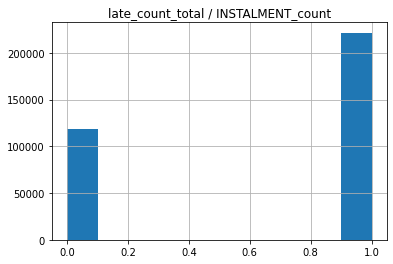

In [4]:
chao_label_y = pd.DataFrame(chao_label['late_count_total / INSTALMENT_count'].apply(lambda x:1 if x>0 else x))
chao_label_y.hist()
chao_label_y

In [5]:
SK_ID_CURR = chao_label['SK_ID_CURR']
new_label = pd.concat([SK_ID_CURR,chao_label_y],axis=1)
new_label

,SK_ID_CURR,late_count_total / INSTALMENT_count
0,100001,1.0
1,100002,0.0
2,100003,0.0
3,100004,0.0
4,100005,1.0
...,...,...
340360,448526,0.0
340361,449328,0.0
340362,451328,0.0
340363,451362,0.0


In [6]:
data = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_clear_newlabel.csv',index_col=0)
data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,total_label
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,4.558868
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,-1.468816
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,-2.524768
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0,0.574245
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,0,-1.157093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,0,-1.373230
356251,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,0,-1.127277
356252,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,0,1,0,0,0,0,0,1,0,2.734850
356253,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0,0,1,0,0,2.899147


In [7]:
data.drop(['total_label'],axis=1,inplace=True)
data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,1,0,1,0,0,0,0,0,1,0
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,1,0,1,1,0,0,0,0,0,0
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,0,0
356251,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,0,0
356252,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,0,0,1,0,0,0,0,0,1,0
356253,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,0,1,0,0,0,0,1,0,0


In [8]:
new_data = data.merge(new_label,left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='right')
new_data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,late_count_total / INSTALMENT_count
0,100001,0,135000.0,3,-19241,-2329,-5170.0,-812,1,0,...,0,1,0,0,0,0,0,1,0,1.0
1,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,0.0
2,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,0.0
3,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,0.0
4,100005,0,99000.0,1,-18064,-4469,-9118.0,-1623,1,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,448526,0,271651.5,3,-8772,-422,-3454.0,-1428,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340361,449328,0,103500.0,1,-16265,-674,-29.0,-4400,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340362,451328,0,108000.0,3,-9335,-662,-3801.0,-1981,1,0,...,0,0,0,0,0,0,0,0,0,0.0
340363,451362,2,337500.0,3,-14116,-1936,-8242.0,-539,1,0,...,1,1,0,0,0,0,0,1,0,0.0


In [9]:
# rfe_feature_selection_random_forest
group3_feature = new_data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_TYPE_SUITE_Unaccompanied',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Married', 'NAME_HOUSING_TYPE_House / apartment',
       'OCCUPATION_TYPE_Laborers', 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
       'ORGANIZATION_TYPE_Self-employed',
       'FONDKAPREMONT_MODE_reg oper account', 'HOUSETYPE_MODE_block of flats',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick']]
group3_feature

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,...,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Self-employed,FONDKAPREMONT_MODE_reg oper account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick"
0,0,135000.0,3,-19241,-2329,-5170.0,-812,0,0,2.0,...,0,0,0,1,0,0,0,1,0,1
1,0,202500.0,1,-9461,-637,-3648.0,-2120,0,1,1.0,...,0,0,0,0,1,0,1,1,0,1
2,0,270000.0,3,-16765,-1188,-1186.0,-291,0,1,2.0,...,1,0,0,0,0,0,1,1,0,0
3,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0,99000.0,1,-18064,-4469,-9118.0,-1623,0,0,2.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,0,271651.5,3,-8772,-422,-3454.0,-1428,1,0,2.0,...,0,0,1,0,0,0,0,0,0,0
340361,0,103500.0,1,-16265,-674,-29.0,-4400,1,1,2.0,...,0,0,0,1,0,0,0,0,0,0
340362,0,108000.0,3,-9335,-662,-3801.0,-1981,0,0,2.0,...,0,0,1,0,0,0,0,0,0,0
340363,2,337500.0,3,-14116,-1936,-8242.0,-539,0,1,4.0,...,0,0,0,0,0,0,0,1,0,1


In [10]:
# rfe_feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

X = group3_feature
y = new_data[['late_count_total / INSTALMENT_count']]

# SMOTE方法
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train,y_train)

scaler = preprocessing.StandardScaler().fit(X_res)
X_res = scaler.transform(X_res)

# we can change kernel to rbf, poly, linear
model = SVC(kernel='rbf', C=1.3) # RBF kernel(default)，C為懲罰參數，設越高越不給越界，設越低就可以容忍越界
model.fit(X_res, y_res)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('score: {}'.format(score))
print('f1_score: {}'.format(f1_score))
print('con_matrix: {}'.format(con_matrix))

/Users/hazel/opt/anaconda3/envs/crawler/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of correct sample: 44476
accuracy: 0.6533574251171537
score: 0.6533574251171537
f1_score: [0.2440009  0.77512317]
con_matrix: [[ 3808 19938]
 [ 3659 40668]]


In [11]:
print(model.score(X_res, y_res))
print(model.score(X_test,y_test))

0.747405907763103
0.6533574251171537
